In [1]:
import numpy as np
import pandas as pd
import seaborn as sbs
from matplotlib import pyplot as plt

## DataFrame Vectorized Operations

In [2]:
# Adding DataFrames with the column names

df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})

print(df1 + df2)

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [4]:
# Adding DataFrames with overlapping column names 

df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})

print(df1 + df2)
print(df1.add(df2, fill_value=0))

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN
     a   b   c     d
0  1.0  74  47  10.0
1  2.0  85  58  20.0
2  3.0  96  69  30.0


In [3]:
# Adding DataFrames with overlapping row indexes

df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])

print(df1 + df2)

         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [4]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})


def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift()


get_hourly_entries_and_exits(entries_and_exits)


,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [5]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits.diff()


get_hourly_entries_and_exits(entries_and_exits)


,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## DataFrame applymap()

In [6]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
 
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [7]:
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def to_letter(grade):
        if grade < 0 or grade > 100:
            raise ValueError
        elif grade <= 59:
            return 'F'
        elif grade <= 69:
            return 'D'
        elif grade <= 79:
            return 'C'
        elif grade <= 89:
            return 'B'
        else:
            return 'A'
        
    return grades.applymap(to_letter)


convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


## DataFrame qcut(), sort_values() and apply()

In [8]:
def convert_grades_curve(exam_grades):
    """Pandas has a bult-in function that will perform this calculation
    This will give the bottom 0% to 10% of students the grade 'F', 10% to 20% the grade 'D', and so on. 
    
    see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    """
    return pd.qcut(exam_grades, [0, 0.1, 0.2, 0.5, 0.8, 1], labels=['F', 'D', 'C', 'B', 'A'])
        

# qcut() operates on a list, array, or Series. This is the result of running the function on a single column of the
# DataFrame.

print(convert_grades_curve(grades_df['exam1']))
    

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


In [9]:
# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately

print(grades_df.apply(convert_grades_curve))

        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [10]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    def zscore(x):
        x = x - x.mean()
        return x / x.std(ddof=0)
    
    return df.apply(zscore)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [12]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    def second(x):
        if len(x) < 2:
            raise ValueError
        return x.sort_values(ascending=False)[1]
    
    return df.apply(second)

second_largest(df)

a     5
b    10
c    20
dtype: int64

## Adding a DataFrame to a Series

In [13]:
# Adding a Series to a square DataFrame

s = pd.Series([1, 2, 3, 4])

df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
print(df + s)

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [14]:
# Adding a Series to a one-row DataFrame 

s = pd.Series([1, 2, 3, 4])

df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
print(df + s)

    0   1   2   3
0  11  22  33  44


In [15]:
# Adding a Series to a one-column DataFrame

s = pd.Series([1, 2, 3, 4])

df = pd.DataFrame({0: [10, 20, 30, 40]})
    
print(df + s)
    

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [16]:
# Adding when DataFrame column names match Series index

s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])

df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
print(df + s)
    

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [17]:
# Adding when DataFrame column names don't match Series index

s = pd.Series([1, 2, 3, 4])

df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
print(df + s)

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [18]:
# Adding with axis='index'
# The functions sub(), mul(), and div() work similarly to add()

s = pd.Series([1, 2, 3, 4])

df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
print(df.add(s, axis='index'))
    

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [19]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

grades_df.mean(axis='columns')

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [20]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    normalized = df - df.mean()
    return normalized / normalized.std(ddof=0)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [21]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    normalized = df.sub(df.mean(axis='columns'), axis='index')
    return normalized.div(normalized.std(ddof=0, axis='columns'), axis='index')

standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


## Pandas `groupby()`

In [22]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

print(example_df)
    

   value   even  above_three
a      1  False        False
b      3  False        False
c      2   True        False
d      4   True         True
e      1  False        False
f      6   True         True
g      4   True         True


In [24]:
# Examine groups
# The groups attribute is a dictionary mapping keys to lists of row indexes

grouped_data = example_df.groupby('even')

print(grouped_data)
print()
print(grouped_data.groups)



{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [25]:
# Group by multiple columns

grouped_data = example_df.groupby(['even', 'above_three'])

print(grouped_data.groups)
    

{(False, False): ['a', 'b', 'e'], (True, False): ['c'], (True, True): ['d', 'f', 'g']}


In [26]:
# Get sum of each group

grouped_data = example_df.groupby('even')

print(grouped_data.sum())
    

       value  above_three
even                     
False      5            0
True      16            3


In [38]:
# Limit columns in result

grouped_data = example_df.groupby('even')

print('Resulting DataFrame:\n', grouped_data.sum())
    
# You can take one or more columns from the result DataFrame
print('\nColumns are Series:\n', grouped_data.sum()['value'])
    
# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print()
print(grouped_data['value'].sum())
    

Resulting DataFrame:
        value  above_three
even                     
False      5            0
True      16            3

Columns are Series:
 even
False     5
True     16
Name: value, dtype: int32

even
False     5
True     16
Name: value, dtype: int32


In [39]:
# iterate over groups

df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                ('bird', 'Psittaciformes', 24.0),
                ('mammal', 'Carnivora', 80.2),
                ('mammal', 'Primates', np.nan),
                ('mammal', 'Carnivora', 58)],
   index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
   columns=('class', 'order', 'max_speed'))

print(df)
print()

# default is axis=
grouped = df.groupby('class')
print(grouped.groups)
print()
for group, df in grouped:
    print('group:\n', group, '\nDataFrame:\n', df)
    print()

          class           order  max_speed
falcon     bird   Falconiformes      389.0
parrot     bird  Psittaciformes       24.0
lion     mammal       Carnivora       80.2
monkey   mammal        Primates        NaN
leopard  mammal       Carnivora       58.0

{'bird': ['falcon', 'parrot'], 'mammal': ['lion', 'monkey', 'leopard']}

group:
 bird 
DataFrame:
        class           order  max_speed
falcon  bird   Falconiformes      389.0
parrot  bird  Psittaciformes       24.0

group:
 mammal 
DataFrame:
           class      order  max_speed
lion     mammal  Carnivora       80.2
monkey   mammal   Primates        NaN
leopard  mammal  Carnivora       58.0



In [40]:
filename = "../data/nyc_subway_weather.csv"
subway_df = pd.read_csv(filename)

subway_df.head(n=8)  # get the first few rows

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15.0,34.0,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19.0,40.0,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488.0,118.0,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.0,30.238333,54.166667,8.25,40.700348,-73.887177


In [41]:
# Group the subway data by a variable of choice, then print out the mean ridership within each group and create a plot

by_hour = subway_df.groupby('hour')

mean_ridership_by_hour = by_hour[['ENTRIESn_hourly', 'EXITSn_hourly']].mean()
mean_ridership_by_hour

,ENTRIESn_hourly,EXITSn_hourly
hour,,
0,1403.248441,1119.521415
4,311.717653,299.966942
8,879.029929,527.669428
12,3010.949693,2216.044035
16,2306.527816,1592.556180
20,3226.240093,2259.895955


<AxesSubplot:title={'center':'Mean ridership per hour of day'}, xlabel='hour'>

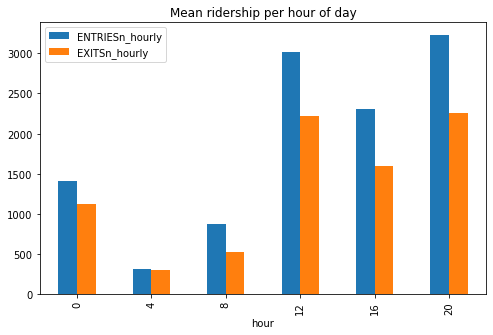

In [42]:
mean_ridership_by_hour.plot(kind='bar', figsize=(8,5), title='Mean ridership per hour of day')

## Calculating Hourly Entries and Exits using `grouby()`

In [43]:
values = np.array([1, 3, 2, 4, 1, 6, 4])

example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [44]:
# Standardize each group

def standardize(xs):
    return (xs - xs.mean()) / xs.std()

grouped_data = example_df.groupby('even')
result = grouped_data['value'].apply(standardize)

print(result)
    

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [45]:
# Find second largest value in each group

def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return sorted_xs.iloc[1]


grouped_data = example_df.groupby('even')

print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In [46]:
# DataFrame with cumulative entries and exits for multiple stations

ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

ridership_df


,UNIT,TIMEn,ENTRIESn,EXITSn
0,R051,00:00:00,3144312,1088151
1,R079,02:00:00,8936644,13755385
2,R051,04:00:00,3144335,1088159
3,R079,06:00:00,8936658,13755393
4,R051,08:00:00,3144353,1088177
5,R079,10:00:00,8936687,13755598
6,R051,12:00:00,3144424,1088231
7,R079,14:00:00,8936819,13756191
8,R051,16:00:00,3144594,1088275


In [47]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    def diff(s):
        return s - s.shift()
        
    grouped = ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(diff)
#     print(grouped)
#     result = entries_and_exits
#     result['ENTRIESn'] = grouped['ENTRIESn']
#     result['EXITSn'] = grouped['EXITSn']
    return entries_and_exits.merge(grouped, left_index=True, right_index=True, suffixes=['','_hourly'])


get_hourly_entries_and_exits(ridership_df)

,UNIT,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,R051,00:00:00,3144312,1088151,NaN,NaN
1,R079,02:00:00,8936644,13755385,NaN,NaN
2,R051,04:00:00,3144335,1088159,23.0,8.0
3,R079,06:00:00,8936658,13755393,14.0,8.0
4,R051,08:00:00,3144353,1088177,18.0,18.0
5,R079,10:00:00,8936687,13755598,29.0,205.0
6,R051,12:00:00,3144424,1088231,71.0,54.0
7,R079,14:00:00,8936819,13756191,132.0,593.0
8,R051,16:00:00,3144594,1088275,170.0,44.0


## Pandas `merge()`

In [48]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})


In [49]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. 
    Only include times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on=['DATEn', 'hour', 'latitude', 'longitude'])

combine_dfs(subway_df, weather_df)

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


## More `groupby()`

In [50]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [54]:
# groupby() without as_index

first_even = example_df.groupby('even')  # 'even' is no longer a column in the resulting DataFrame

for group, df in first_even:
    print(df)

print()
print(first_even.first())


   value   even  above_three
a      1  False        False
b      3  False        False
e      1  False        False
   value  even  above_three
c      2  True        False
d      4  True         True
f      6  True         True
g      4  True         True

       value  above_three
even                     
False      1        False
True       2        False


In [55]:
# groupby() with as_index=False

first_even = example_df.groupby('even', as_index=False)  # Now 'even' is still a column in the resulting DataFrame

for group, df in first_even:
    print(df)

print()
print(first_even.first())

   value   even  above_three
a      1  False        False
b      3  False        False
e      1  False        False
   value  even  above_three
c      2  True        False
d      4  True         True
f      6  True         True
g      4  True         True

    even  value  above_three
0  False      1        False
1   True      2        False


## Plotting for DataFrames

In [57]:
filename = "../data/nyc_subway_weather.csv"
subway = pd.read_csv(filename)

subway.head(n=3)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177


## Histograms of subway ridership on both days with rain and days without rain

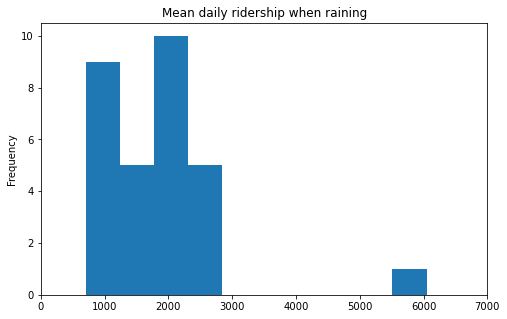

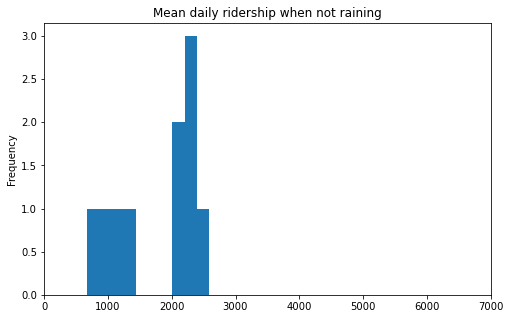

In [103]:
ridership = subway.groupby(['rain', 'DATEn'])['ENTRIESn_hourly'].mean()

ridership.loc[0].plot(kind='hist', figsize=(8,5), title='Mean daily ridership when raining', xlim=(0, 7000))
plt.show()

ridership.loc[1].plot(kind='hist', figsize=(8,5), title='Mean daily ridership when not raining', xlim=(0, 7000))
plt.show()

## A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size

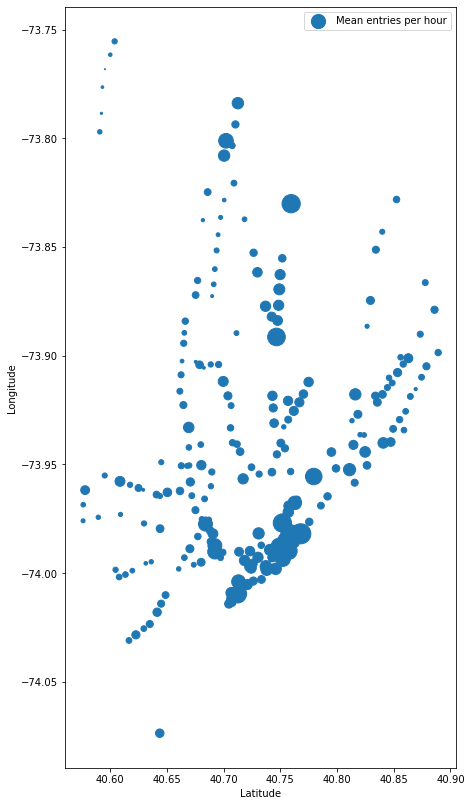

In [118]:
ridership = subway.groupby(['latitude', 'longitude'], as_index=False)['ENTRIESn_hourly'].mean()

plt.figure(figsize=(7, 14))

plt.scatter(ridership['latitude'], ridership['longitude'], s=ridership['ENTRIESn_hourly']/25, label='Mean entries per hour')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

## A scatterplot with subway ridership on one axis and temperature on the other

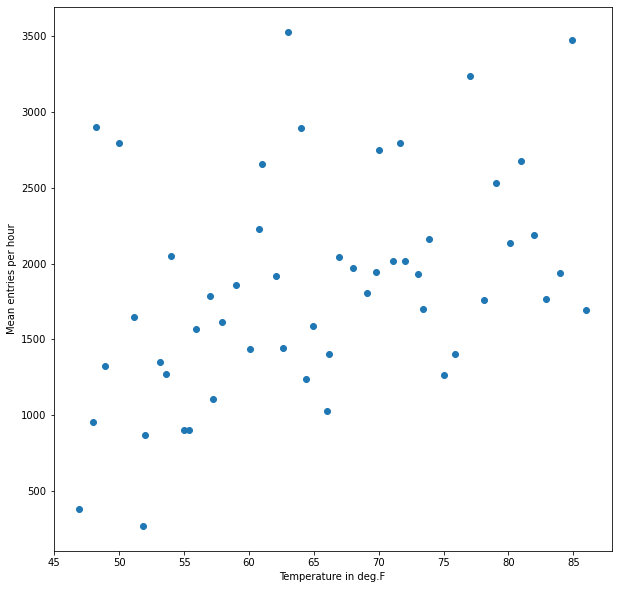

In [120]:
ridership = subway.groupby('tempi', as_index=False)['ENTRIESn_hourly'].mean()

plt.figure(figsize=(10, 10))

plt.scatter(ridership['tempi'], ridership['ENTRIESn_hourly'])
plt.xlabel('Temperature in deg.F')
plt.ylabel('Mean entries per hour')

plt.show()

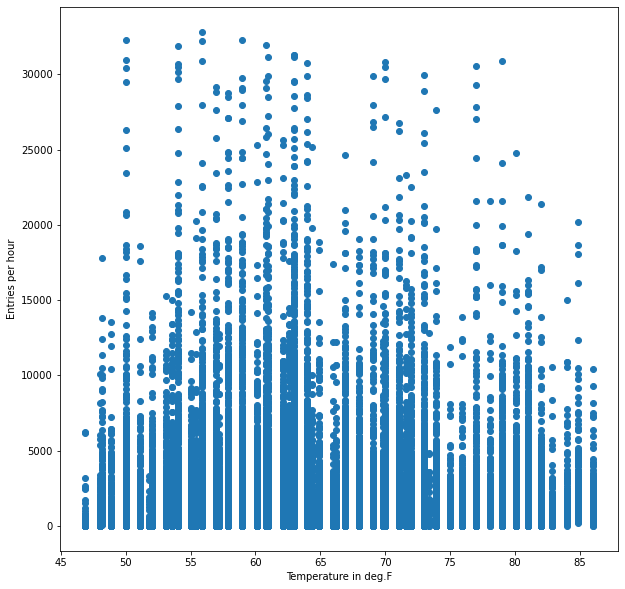

In [122]:
ridership = subway
plt.figure(figsize=(10, 10))

plt.scatter(ridership['tempi'], ridership['ENTRIESn_hourly'])
plt.xlabel('Temperature in deg.F')
plt.ylabel('Entries per hour')

plt.show()